# Grade: /100 Marks

# Assignment 02: Maximum Likelihood

### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

### Maximum Likelihood

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) is a continuous probability distribution often used to predict time when an event might ocurr, for instance Earthquake.

If we know $y$ is influenced by feature $x$, then we can use the maximum likelihood principle to develop a regression model that estimates the mean of $Y$ given $X=x$.

### Global Toolbox

In [1]:
# Packages for this assignment
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as so
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.display import display

### Question 1: /2 Marks

The negative log likelihood for a exponential random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg(\ln(\lambda) - \lambda y_i \Bigg)$$

Here, $\mathbf{y}=(y_i) \in \mathbb{R^N}$ is a vector  and $\lambda$ is a scalar value.

Define a function called `exponentialNegLogLikelihood` that takes a vector  $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.

Test your function by calling it with `lamb = 2` and `y = np.array([1, 4, 6, 15])`. It should yield a value about 49.23.

Test your function by calling it with `lamb = np.array([1, 0.5, 8, 5])` and  `y = np.array([1.5, 0.8, 5.5, 4])`. It should yield a value about 62.90.

FYI: The domain of logarithmic function of $\lambda$ is $\lambda > 0$.

In [2]:
# Write the function
def exponentialNegLogLikelihood(lamb, y):
    return -np.sum(np.log(lamb) - lamb * y)

# 2 pts
print(exponentialNegLogLikelihood(2, np.array([1, 4, 6, 15])))
print(exponentialNegLogLikelihood(np.array([1,0.5, 8, 5]), np.array([1.5, 0.8, 5.5, 4])))

49.227411277760226
62.90426772644601


---

### Question 2: /3 Marks

Write a function called `exponentialRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ , a design matrix $\mathbf{X}$ of features, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent, and exponentially distributed with $\lambda=\exp(-\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([1, 2.5, 12])`

It should yield a value about 15.24.

In [3]:
# Write the function
def exponentialRegressionNegLogLikelihood(b, X, y):
    lamb = np.exp(-X @ b)
    return exponentialNegLogLikelihood(lamb, y)

print(exponentialRegressionNegLogLikelihood(
    np.array([2, 1]),
    np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T,
    np.array([1, 2.5, 12])
))


# 3 pts

15.23757690453085


---
### Question 3: /2 Marks

Answer the questions:

1. In `exponentialRegressionNegLogLikelihood`, what problem can happen if we assume that $\lambda = \mathbf{X}\beta$?. [1 pts]

2. What property of the exponential distribution is guaranteed when we assume that $\lambda$ has the form of $\exp(-\mathbf{X}\beta)$? [1 pts]


**Written Answer:**

1. If we assume this, then there is no guarantee that the lambda parameter is always positive, which is essential since the input of the natural log function is required to be positive.

2. By assuming that $\lambda$ is an exponential form, we guarantee that the lambda parameter is always positive, which similar to above, is essential since the input of the natural log function is required to be positive. Also, this form ensures that when computing the log likelihood, the $\exp$ and $\ln$ cancel out, leaving $X \beta$, a much faster computation since it is just the sum of products. Also, since these cancel out, the likelihood function is differentiable everywhere; otherwise, since the derivative of $\ln x$ is $\frac{1}{x}$, it would not be differentiable at 0.


---
### Question 4: /2 Marks

Write a function called `Model_predict` whose arguments are a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$, and its outputs are predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$.

Test your function by calling it with
* `b = np.array([2, 1])`
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`

It should yield an array with elements being about 148.4, 244.7, 99.5.

In [4]:
# Write the function
def Model_predict(b, X):
    return np.exp(X @ b)

# 2 pts
print(Model_predict(np.array([2, 1]), np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T))

[148.4131591  244.69193226  99.48431564]


---
### Question 5: /7 Marks

Write a function called `Model_fit` which accepts as its first argument a design matrix $\mathbf{X}$ and as its second argument a vector of $\mathbf{y}$. Its output should be the maximum likelihood estimates for the coefficients of exponential regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with
* `X = np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T`
* `y = np.array([0, 2.5, 10])`

Print the estimated coefficient $b$.

In [5]:
# Write the function
def Model_fit(X, y):
    # Instantiate a guess for the betas, beta_start, so that the optimizer has somewhere to start
    # Keep in mind what shape the beta_start should be. It shoud have the same number of elements as X as columns
    num_betas = X.shape[1]
    beta_start = np.ones(num_betas)
    # Minimize the appropriate likelihood function
    mle = so.minimize(exponentialRegressionNegLogLikelihood, beta_start, args=(X, y))
    # Extract the maximum likelihood estimates from the optimizer.
    betas = mle.x
    return betas
# 5 pts

In [6]:
# Test the function and print estimated b

# 2 pts
print(Model_fit(np.array([[1.4, 2, 0.8], [2.2, 1.5, 3]]).T, np.array([0, 2.5, 10])))

[-0.2814173   0.71207989]


---
### Question 6: /12 Mark(s)

Use the data `exponential_regression.csv`, where $y$ represents time units to fit a exponential regression using the functions that you already have created.

* Use your function to estimate the coefficients.
* Use `mean_squared_error` to calculate the regression error.
* Plot a scatterplot of the data as well as the regression curve (plot with the range over $x \in [-2.15, 2.15]$).


In [7]:
# Load the data
# Notice that this file is separated by semicolon (Hint: specify "sep=")
data = pd.read_csv('exponential_regression.csv', sep=';')

# 1 pts

# Get the x and y. Create the design matrix X
y = data['y'].values
X = data['x'].values.reshape(-1, 1)
X_with_ones = np.c_[np.ones_like(X), X]

# 2 pts

# Find the maximum likelihood estimates for the coefficients
betas = Model_fit(X_with_ones, y)
print(f'The estimated coefficients are :{betas}')
# 2 pts

The estimated coefficients are :[ 0.07120227 -1.75117881]


In [8]:
# Calculate the mean squared error
def mean_squared_error(y, yp):
    residuals = y - yp
    mse = np.mean(residuals ** 2)
    return mse

yp = Model_predict(betas, X_with_ones)
mse = mean_squared_error(y, yp)
print(f"The mean of sqaured error is {mse}")
# 2 pts

The mean of sqaured error is 3.368661378364023


In [9]:
# Generate new data for plotting regression curve
X_curve = np.c_[np.ones_like(X), np.linspace(-2.15, 2.15, 101).reshape(-1, 1)]

# Make predictions on the new data
y_curve = Model_predict(betas, X_curve)

# 3 pts

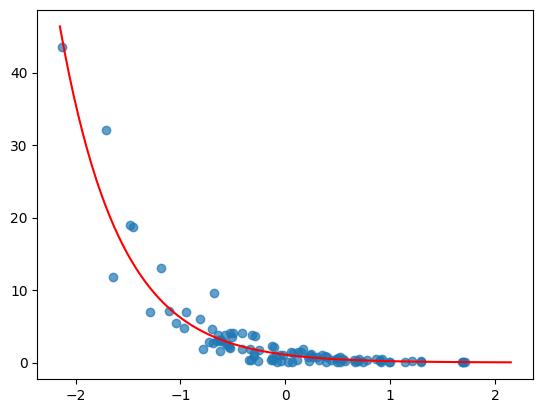

In [10]:
# Make the plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X_curve[:, 1], y_curve, color='red')
plt.show()
# 2 pts

---
### Question 7:  /14 Marks

* Fit a linear regression (ordinary least squares) to the data using [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from `sklearn` and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the regression line over the same range.



In [11]:
# Fit the linear regression model
linear_model = LinearRegression()
X_linear = np.c_[np.ones_like(X), X]
result = linear_model.fit(X_linear, y)


betas_linear = linear_model.coef_
print(f'The estimated coefficients using linear regression are {betas_linear}')
# 4 pts


# Calculate the mean squared error

mse_linear = mean_squared_error(y, linear_model.predict(X_linear))
print(f"The mean of sqaured error is {mse_linear}")

# 4 pts

The estimated coefficients using linear regression are [ 0.         -5.11409159]
The mean of sqaured error is 20.804808321384726


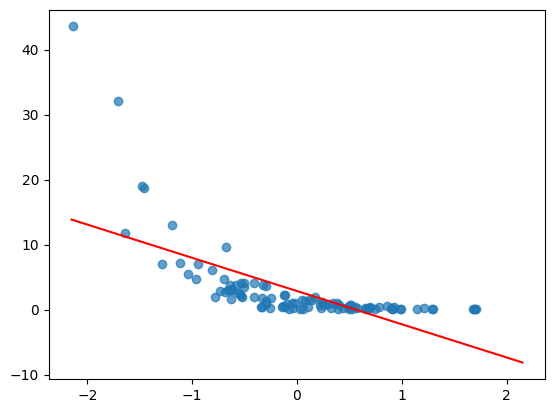

In [12]:
# Make predictions on the new data
X_curve_linear = np.c_[np.ones_like(X), np.linspace(-2.15, 2.15, 101).reshape(-1, 1)]
y_curve_linear = linear_model.predict(X_curve_linear)

# 2 pts

# Make the plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X_curve_linear[:, 1], y_curve_linear, color='red')
plt.show()

# 4 pts

---
### Question 8:  /16 Marks

* Fit a linear regression (ordinary least squares) to the data with a square term, and obtain parameter estimates.
* Use `mean_squared_error` to calculate the regression error.
* Plot the predictions over the same range.

Note that in this case the design matrix X should look like

$X =[[1,x_1,x_1^2],[1,x_2,x_2^2],...]$

In [13]:
# Create new design matrix and fit the linear regression model
X_linear_sq = np.c_[np.ones_like(X), X, X**2]
linear_sq_model = LinearRegression()
linear_sq_model.fit(X_linear_sq, y)

betas_sq = linear_sq_model.coef_
print(f'The estimated coefficients using multiple linear regression are {betas_sq}')
# 6 pts

# Calculate the mean squared error


mse_sq = mean_squared_error(y, linear_sq_model.predict(X_linear_sq))
print(f"The mean of sqaured error is {mse_sq}")
# 4 pts

The estimated coefficients using multiple linear regression are [ 0.         -4.96170882  4.34031982]
The mean of sqaured error is 7.529391721951649


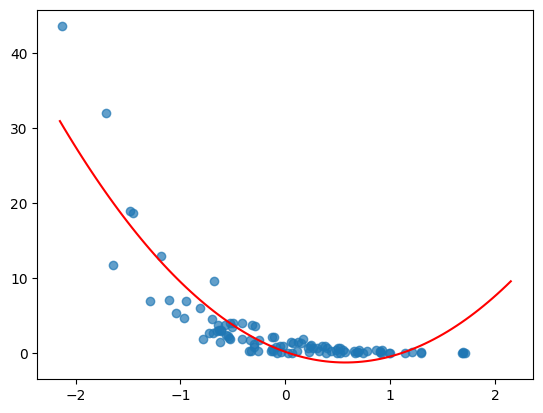

In [14]:
# Make predictions on the new data
X_linspaced = np.linspace(-2.15, 2.15, 101).reshape(-1, 1)
X_curve_linear_sq = np.c_[np.ones_like(X), X_linspaced, X_linspaced ** 2]
y_curve_linear_sq = linear_sq_model.predict(X_curve_linear_sq)

# 2 pts

# Make the plot
plt.scatter(X, y, alpha=0.7)
plt.plot(X_curve_linear_sq[:, 1], y_curve_linear_sq, color='red')
plt.show()

# 4 pts

---
### Question 9: /2 Marks

Among the three models, which one would you select? What is the major problem using linear regression? Just a reminder that in this case $y$ is measured in time units.

**Written Answer**

I would select the exponential regression model. It has the lowest MSE. The major problems with using linear regression are that:

1. Linear regressions assumes a linear relationship between the dependent and independent variables. By plotting the data, it is clear that the relationship is not linear (as is common with time-based data), so a linear model would fit poorly to the data.
2. Also, an exponential regression model's predictions will always be positive, which makes sense since $y$ is measured in time units. Linear regression models don't take this into account, so it erroneously predicts that data could be negative.


---
### Question 10: /20 Marks

We wish to do an experiment to determine if ants search for food using a random search or directed search method. To help design the experiment we first will run some simulations. In the experiment, ants are placed inside a 50 mm $\times$ 50 mm box. They cannot climb the wall, but can escape through an opening of size 5 mm in the wall. Repeated measurements of how far an ant travels in 1 second show an average speed of 2 mm per second. Our simulation needs to determine the probability that an ant escapes the box in 600 seconds (hint: so your main iteration would look like `for t in range(600):`) if their motion is indeed random. Assume the ant is always initially placed in the center of the box and simulate a simple random walk in 2D on discrete time in this fashion: Have the ant live on a discrete lattice. The ant takes 2 mm to the left if a random number $u$ satisfies $u < 0.25$. The ant moves 2 mm to the right if $0.25 \leq u < 0.5$, the ant moves 2 mm up if $0.5 \leq u < 0.75$, and 2 mm down if $0.75 \leq u \leq 1.0$. $u$ is distributed uniformly between 0 and 1 (hint: use `np.random.uniform(low=0, high=1)` to generate it). If a step would take the ant into a wall, repeat the step until it is successful (result is still one time-step). With `attempts = np.linspace(10, 1000, 19)`, run your main iteration under the loop `for M in attempts:` and construct a dataframe (called "ant") with columns for number of attempts (i.e. `M`), number of escapes, and probability of escape for every `M`. Your dataframe would eventually look something like this with 19 rows and real values:

attempts | escapes| probability
---|---|---
10|x1|y1
65|x2|y2
...|...|...
1000|x19|y19

In [15]:
attempts = np.linspace(10, 1000, 19)

x    = 50       # box size in x-direction
y    = 50       # box size in y-direction
time = 600      # in seconds
attempts = np.linspace(10, 1000, 19, dtype='int')
last_escape_path = []
ant = pd.DataFrame(columns=['attempts', 'escapes', 'probability'])

def simulate(M):
    global last_escape_path
    escapes = 0
    for _ in range(M):
        ant_x, ant_y = 25, 25
        speed = 2
        opening_size = 5
        path = [(25, 25)]
        for _ in range(time):
            while True:
                u = np.random.uniform(low=0, high=1)
                new_ant_x, new_ant_y = ant_x, ant_y
                if u < 0.25:
                    new_ant_x -= speed
                elif u < 0.5:
                    new_ant_x += speed
                elif u < 0.75:
                    new_ant_y += speed
                else:
                    new_ant_y -= speed
                # opening is at (0,0) to (5,0) on the X wall
                escaped = new_ant_y < 0 and new_ant_x > 0 and new_ant_x < opening_size
                hit_wall = not escaped and (new_ant_y < 0 or new_ant_x < 0 or new_ant_y > y or new_ant_x > x)

                if escaped or not hit_wall:
                    ant_x, ant_y = new_ant_x, new_ant_y
                    break
            path.append((ant_x, ant_y))
            if escaped:
                escapes += 1
                last_escape_path = path[:]
                break
    
    probability = escapes / M
    return escapes, probability

for M in attempts:
    escapes, probability = simulate(M)
    new_row = pd.DataFrame({'attempts': M, 'escapes': escapes, 'probability': probability}, index=[0])
    ant = pd.concat([ant, new_row], ignore_index=True)

display(ant.head())
display(ant.tail())

,attempts,escapes,probability
0,10,1,0.100000
1,65,8,0.123077
2,120,11,0.091667
3,175,21,0.120000
4,230,16,0.069565


,attempts,escapes,probability
14,780,93,0.119231
15,835,85,0.101796
16,890,107,0.120225
17,945,103,0.108995
18,1000,105,0.105000


---
### Question 11: /5 Marks

Plot the trajectory of the ant in the last escape event.

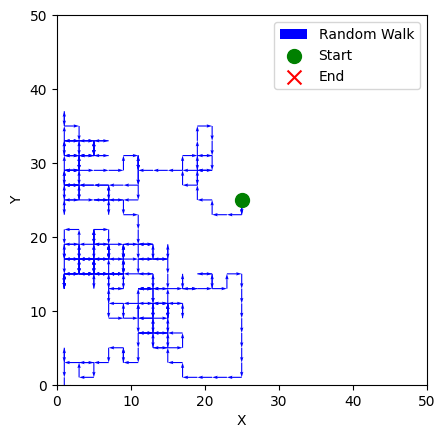

In [16]:
x_coords, y_coords = zip(*last_escape_path)
fig, ax = plt.subplots()
ax.set_aspect('equal')
plt.quiver(x_coords[:-1], y_coords[:-1], 
           [x2 - x1 for x1, x2 in zip(x_coords[:-1], x_coords[1:])], 
           [y2 - y1 for y1, y2 in zip(y_coords[:-1], y_coords[1:])], 
           angles='xy', scale_units='xy', scale=1, color='blue', label='Random Walk')

# Plot start and end points
plt.scatter(x_coords[0], y_coords[0], color='green', marker='o', s=100, label='Start')
plt.scatter(x_coords[-1], y_coords[-1], color='red', marker='x', s=100, label='End')

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 50)
plt.ylim(0, 50)
plt.legend()
plt.show()

---
### Question 12: /5 Mark(s)
Explore the "ant" dataframe. Do you see any trend in probability? What value for probability would you report if you are asked what is the probability of the escape event?

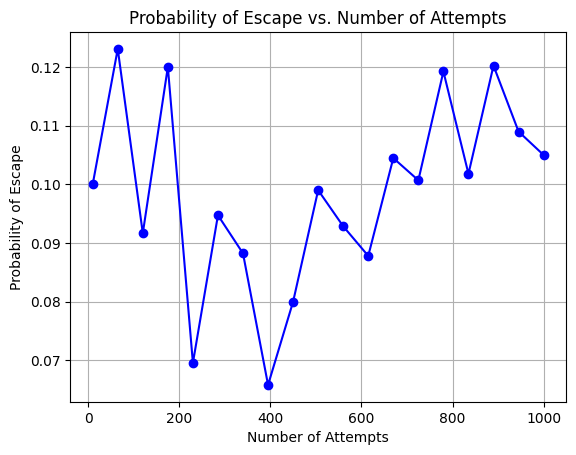

In [17]:
plt.plot(ant['attempts'], ant['probability'], marker='o', linestyle='-', color='b')
plt.xlabel('Number of Attempts')
plt.ylabel('Probability of Escape')
plt.title('Probability of Escape vs. Number of Attempts')
plt.grid(True)
plt.show()

#### Written Answer:

The probability value appears to begin to converge towards $0.10$ as $M \to \infty$. I would report the probability of the escape event as $0.10$.

---
### Question 13: /5 Mark(s)
Now scatter plot `attempts` versus `escapes` and use what you have learned so far to apply linear regression (ordinary least squares) to the data, and plot the predictions over the same range. Report your fit coefficients and compare them against your answer to the previous question and report what you witness and explain why?

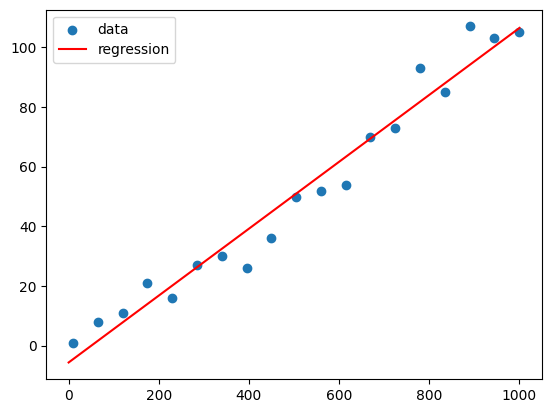

Fit coefficients: [0.         0.11205742]


In [18]:
fig, ax = plt.subplots(dpi = 100)

plt.scatter(ant['attempts'], ant['escapes'], label='data')

X_ant = ant['attempts'].values
y_ant = ant['escapes'].values

X_ant = np.c_[np.ones_like(X_ant), X_ant]

model_ant = LinearRegression()
model_ant.fit(X_ant, y_ant)

X_ant_regression = np.linspace(0, 1001, 10)
X_ant_regression = np.c_[np.ones_like(X_ant_regression), X_ant_regression]
y_ant_regression = model_ant.predict(X_ant_regression)

plt.plot(X_ant_regression[:, 1], y_ant_regression, color='red', label='regression')
plt.legend()
plt.show()

print(f'Fit coefficients: {model_ant.coef_}')

#### Written Answer:

The fit coefficients are $\beta_0 = 0$ and $\beta_1 \approx 0.10$. This indicates a y-intercept of $0$ and a slope of $0.10$. This is in line with our answer from the previous question: since we are plotting the relationship between number of attempts and number of escapes, a slope of $0.10$ indicates that one-tenth of the attempts are escapes, or a probability of approximately $0.10$.

---
### Question 14: /5 Mark(s)
You gain 2 dollars every time the ant escapes, otherwise you loose a dollar. What would be the expected value of the bet and how would you interpret it?

In [19]:
escape_prob = ant['probability'].values
EV = np.average(escape_prob * 2 + (1 - escape_prob) * -1)
print(f'EV: {EV}')

EV: -0.7042332334175426


Let $X$ be the number of dollars gained from the bet. Assuming an escape probability of $0.1$, then $\mathbb E[X] = (0.1)(2) + (0.9)(-1) = -0.7$. So, we would expect to lose 70 cents making this bet. You would have to pay ME at least 70 cents to play this game. Empirically, the data shows an EV of around this value (above).